<a href="https://colab.research.google.com/github/Houndjoisaacetonam/Openclassroomprojet/blob/main/Pret_Projet_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
list_url = ['https://raw.githubusercontent.com/moncoachdata/DATA_DEEP_LEARNING/master/lending_club_loan_two-1.csv',
            'https://raw.githubusercontent.com/moncoachdata/DATA_DEEP_LEARNING/master/lending_club_loan_two-2.csv',
            'https://raw.githubusercontent.com/moncoachdata/DATA_DEEP_LEARNING/master/lending_club_loan_two-3.csv',
            'https://raw.githubusercontent.com/moncoachdata/DATA_DEEP_LEARNING/master/lending_club_loan_two-4.csv',
            'https://raw.githubusercontent.com/moncoachdata/DATA_DEEP_LEARNING/master/lending_club_loan_two-5.csv',
            'https://raw.githubusercontent.com/moncoachdata/DATA_DEEP_LEARNING/master/lending_club_loan_two-6.csv']

df = pd.concat([pd.read_csv(f) for f in list_url],ignore_index=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

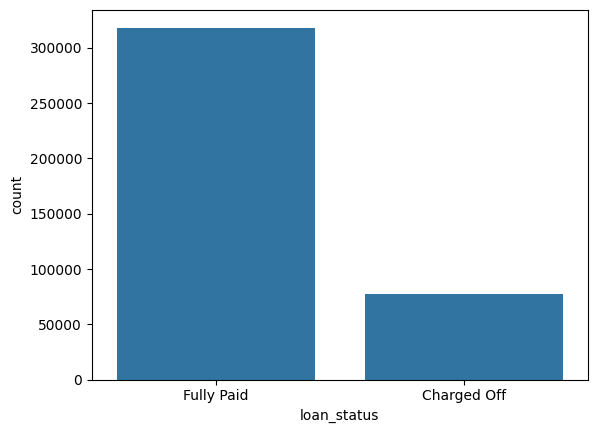

In [75]:
sns.countplot(x='loan_status', data=df)
plt.show()

<ipython-input-76-ba22d4b8da5e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'], kde=False)


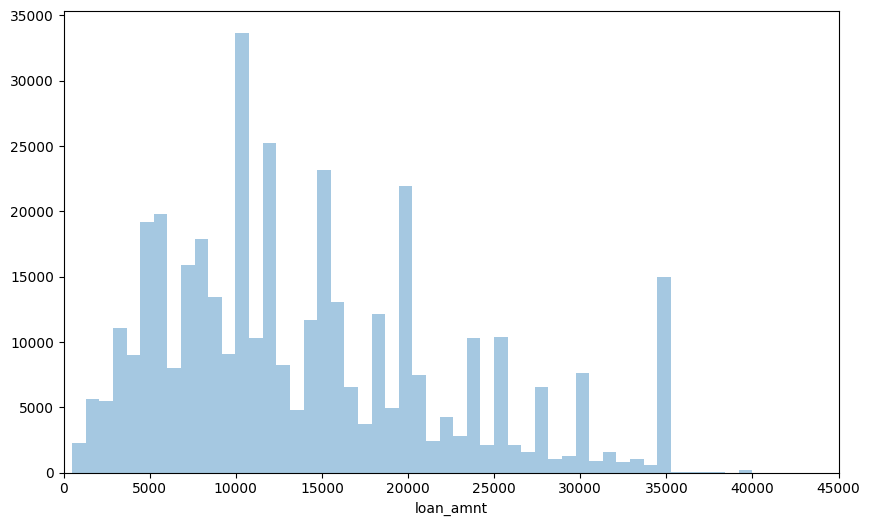

In [76]:
plt.figure(figsize=(10,6))
sns.distplot(df['loan_amnt'], kde=False)
plt.xlim(0, 45000)
plt.show()

In [77]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


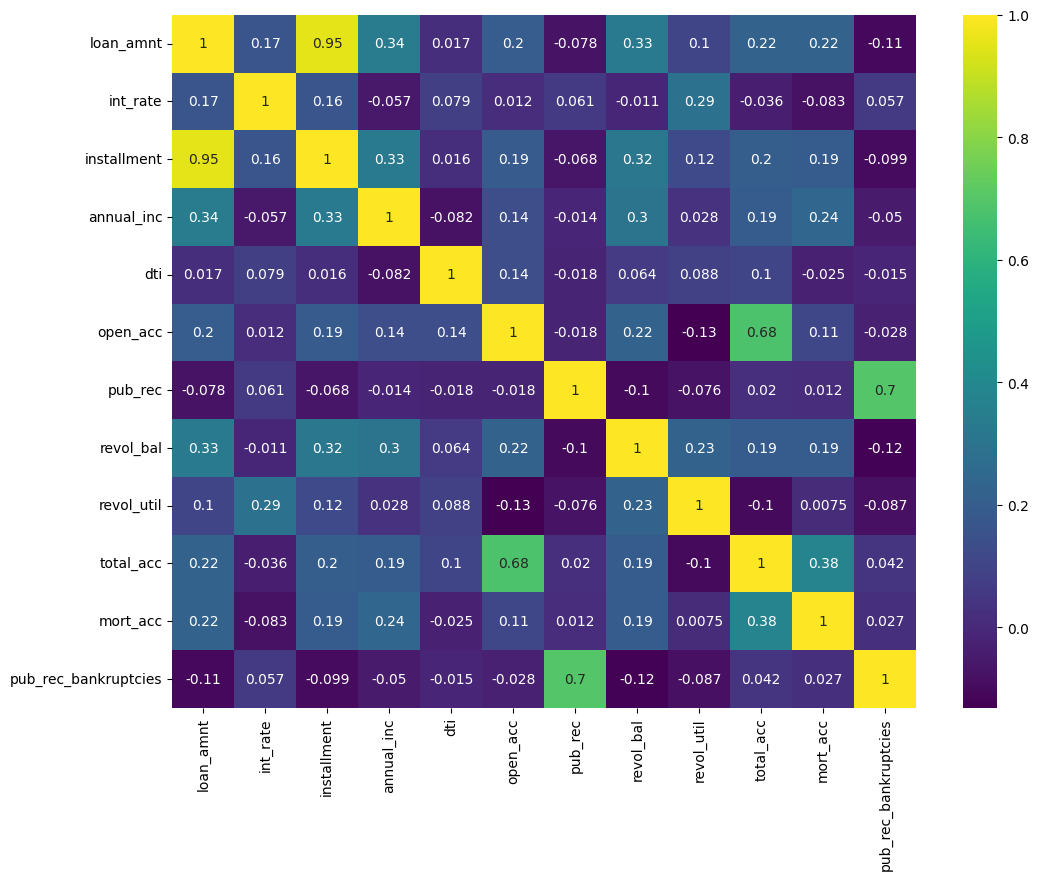

In [78]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.show()

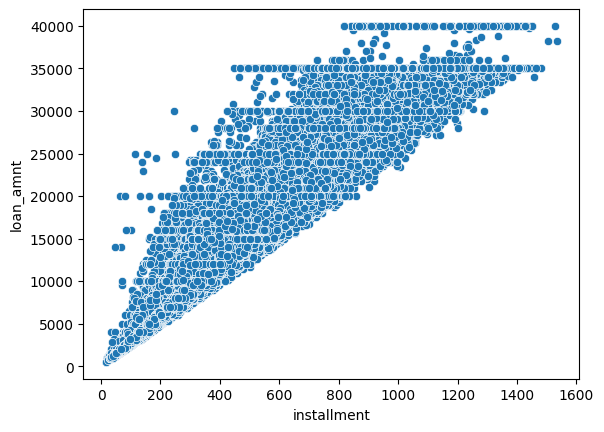

In [79]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)
plt.show()

<ipython-input-80-cf025281d872>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='coolwarm')


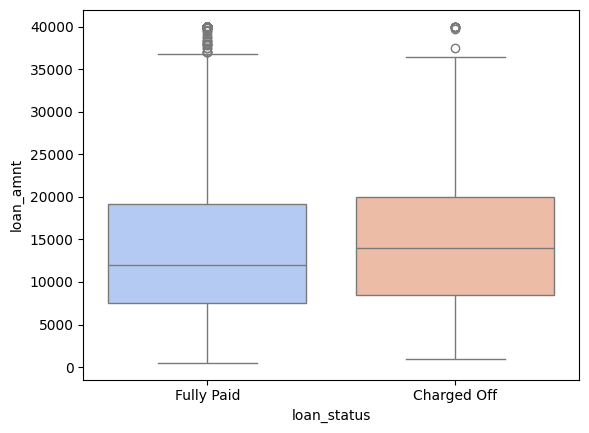

In [80]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='coolwarm')
plt.show()

In [81]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [82]:
df['grade'].sort_values().unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [83]:
df['sub_grade'].sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

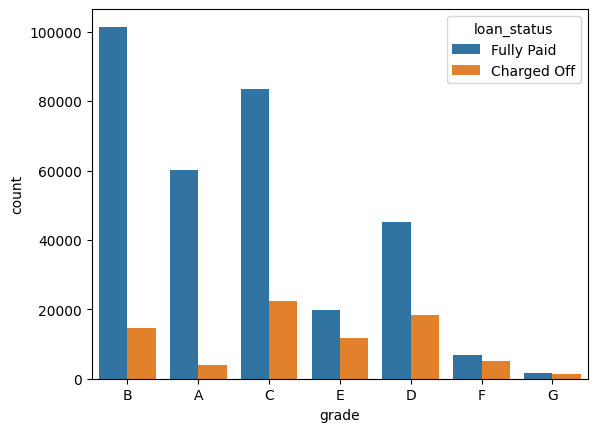

In [84]:
sns.countplot(x='grade', data=df, hue='loan_status')
plt.show()

<ipython-input-85-1080e1536a33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_grade', data=df, order=sorted(df['sub_grade'].unique()), palette='coolwarm')


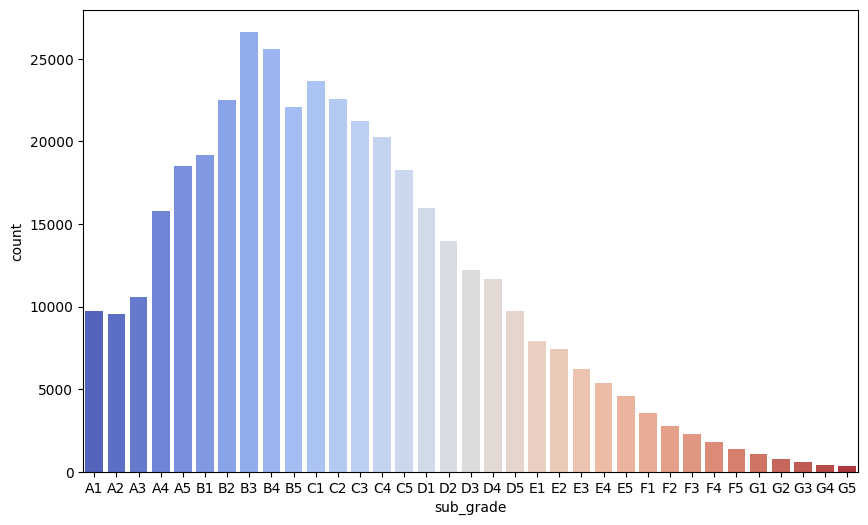

In [85]:
plt.figure(figsize=(10,6))
sns.countplot(x='sub_grade', data=df, order=sorted(df['sub_grade'].unique()), palette='coolwarm')
plt.show()

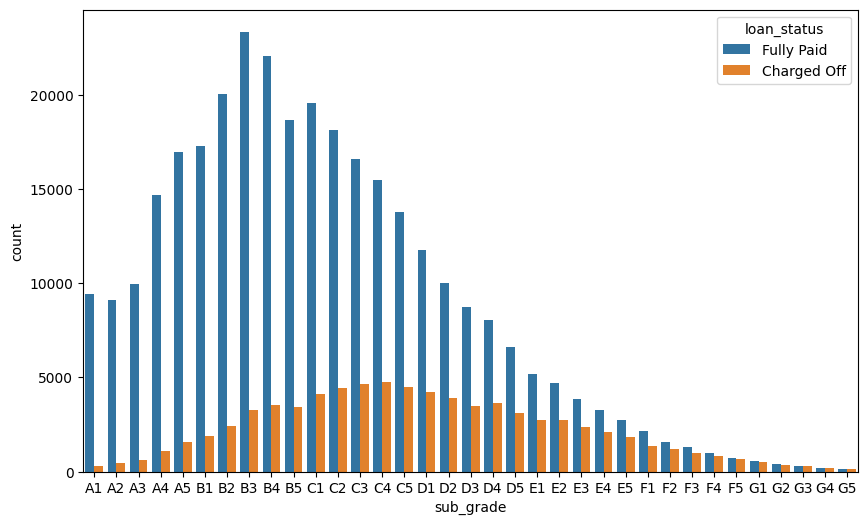

In [86]:
plt.figure(figsize=(10,6))
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sorted(df['sub_grade'].unique()))
plt.show()

In [87]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [88]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [89]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


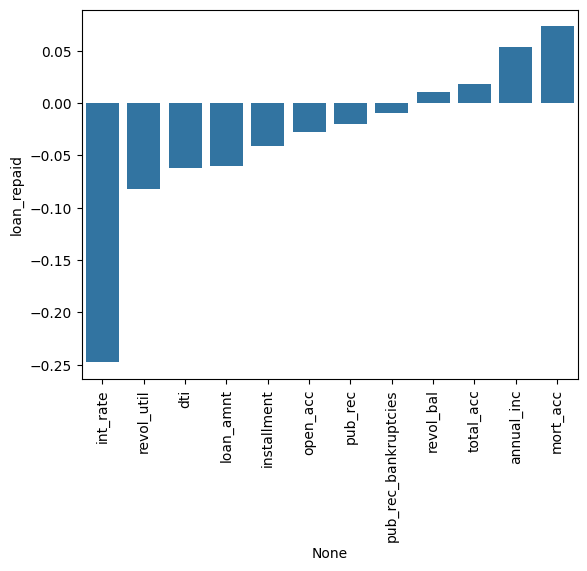

In [90]:
sns.barplot(x=df.corr(numeric_only=True)['loan_repaid'][:-1].sort_values().index, y=df.corr(numeric_only=True)['loan_repaid'][:-1].sort_values())
plt.xticks(rotation=90)
plt.show()

In [91]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [92]:
len(df)

396030

In [93]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [94]:
100 * df.isnull().sum() / len(df)

,0
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_title,5.789208
emp_length,4.621115
home_ownership,0.000000
annual_inc,0.000000


In [95]:
df['emp_title'].nunique()

173105

In [96]:
df['emp_title'].value_counts()

,count
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830
...,...
Postman,1
"McCarthy & Holthus, LLC",1
jp flooring,1


In [97]:
df.drop('emp_title', axis=1, inplace=True)

In [98]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

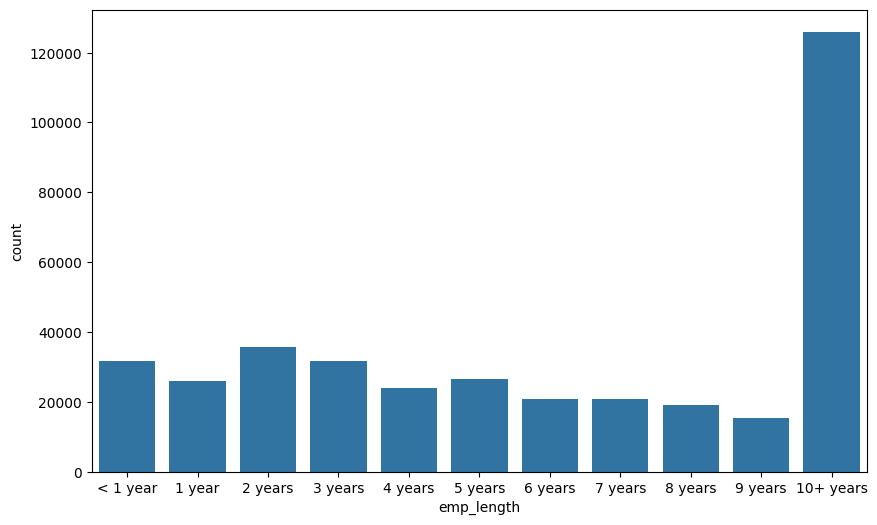

In [99]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length', data=df, order=['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])
plt.show()

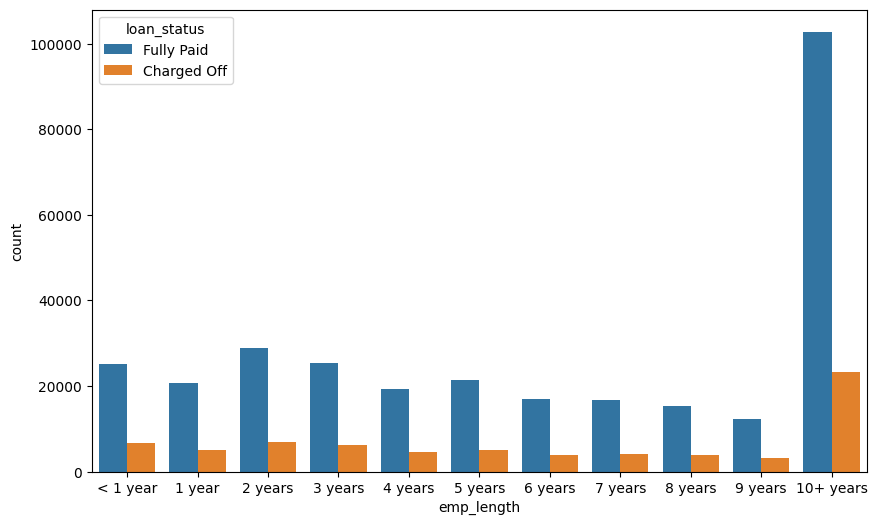

In [100]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length', data=df, hue='loan_status', order=['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])
plt.show()

In [101]:
co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [102]:
fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [103]:
co/fp

,loan_status
emp_length,
1 year,0.248649
10+ years,0.225770
2 years,0.239560
3 years,0.242593
4 years,0.238213
5 years,0.237911
6 years,0.233341
7 years,0.241887
8 years,0.249625


In [104]:
cp = co/fp

<Axes: xlabel='emp_length', ylabel='loan_status'>

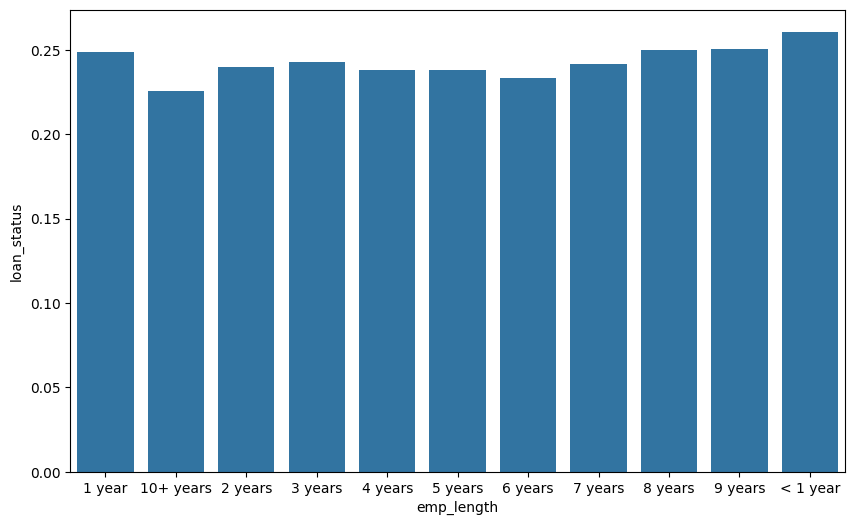

In [105]:
plt.figure(figsize=(10,6))
sns.barplot(x=cp.index, y=cp)

In [106]:
df.drop('emp_length', axis=1, inplace=True)

In [107]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [108]:
df['purpose'].head(10)

,purpose
0,vacation
1,debt_consolidation
2,credit_card
3,credit_card
4,credit_card
5,debt_consolidation
6,home_improvement
7,credit_card
8,debt_consolidation
9,debt_consolidation


In [109]:
df['title'].head(10)

,title
0,Vacation
1,Debt consolidation
2,Credit card refinancing
3,Credit card refinancing
4,Credit Card Refinance
5,Debt consolidation
6,Home improvement
7,No More Credit Cards
8,Debt consolidation
9,Debt Consolidation


In [110]:
df.drop('title', axis=1, inplace=True)

In [111]:
df['mort_acc'].value_counts()

,count
mort_acc,
0.0,139777
1.0,60416
2.0,49948
3.0,38049
4.0,27887
5.0,18194
6.0,11069
7.0,6052
8.0,3121


In [112]:
df.corr(numeric_only=True)['mort_acc'].sort_values()

,mort_acc
int_rate,-0.082583
dti,-0.025439
revol_util,0.007514
pub_rec,0.011552
pub_rec_bankruptcies,0.027239
loan_repaid,0.073111
open_acc,0.109205
installment,0.193694
revol_bal,0.194925
loan_amnt,0.222315


In [113]:
df['mort_acc'].fillna(df.groupby('total_acc')['mort_acc'].transform('mean'), inplace=True)

<ipython-input-113-f3f72e966b25>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mort_acc'].fillna(df.groupby('total_acc')['mort_acc'].transform('mean'), inplace=True)


In [114]:
df.groupby('total_acc')['mort_acc'].mean()

,mort_acc
total_acc,
2.0,0.000000
3.0,0.052023
4.0,0.066743
5.0,0.103289
6.0,0.151293
...,...
124.0,1.000000
129.0,1.000000
135.0,3.000000


In [115]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [116]:
df.dropna(inplace=True)

In [117]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [118]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [119]:
df['term'].value_counts()

,count
term,
36 months,301247
60 months,93972


In [120]:
df['term'] = df['term'].map({' 36 months':36, ' 60 months':60})

In [121]:
df['term'].value_counts()

,count
term,
36,301247
60,93972


In [122]:
df.drop('grade', axis=1, inplace=True)

In [123]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [124]:
df = pd.concat([df.drop('sub_grade', axis=1), subgrade_dummies], axis=1)

In [125]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [126]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [127]:
df.select_dtypes(include='number').columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid'],
      dtype='object')

In [128]:
dumies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)

In [129]:
df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1, inplace=True)

In [130]:
df = pd.concat([df, dumies], axis=1)

In [131]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,False,False,False,False,False,False,False,False,True,False
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,False,False,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,False,False,False,False,False,False,False,False,False,False


In [132]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198022
RENT,159395
OWN,37660
OTHER,110
NONE,29
ANY,3


In [133]:
df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

<ipython-input-133-74f0c062e410>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)


In [134]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

In [135]:
df.drop('home_ownership', axis=1, inplace=True)

In [136]:
df = pd.concat([df, dummies], axis=1)

In [137]:
df['address']

,address
0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...
396025,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [138]:
def get_zip(address):
    return address[-5:]

In [139]:
df['zip_code'] = df['address'].apply(get_zip)

In [140]:
df['zip_code'].value_counts()

,count
zip_code,
70466,56880
22690,56413
30723,56402
48052,55811
00813,45725
29597,45393
05113,45300
11650,11210
93700,11126


In [141]:
du = pd.get_dummies(df['zip_code'], drop_first=True)

In [142]:
df.drop(['zip_code', 'address'], axis=1, inplace=True)

In [143]:
df = pd.concat([df, du], axis=1)

In [144]:
df.drop('issue_d', axis=1, inplace=True)

In [145]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [146]:
df['earliest_cr_line']

,earliest_cr_line
0,1990
1,2004
2,2007
3,2006
4,1999
...,...
396025,2004
396026,2006
396027,1997
396028,1990


In [147]:
from sklearn.model_selection import train_test_split

In [148]:
df.drop('loan_status', axis=1, inplace=True)

In [149]:
X = df.drop('loan_repaid', axis=1).values

In [150]:
y = df['loan_repaid'].values

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [152]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
scaler = MinMaxScaler()

In [154]:
X_train = scaler.fit_transform(X_train)

In [155]:
X_test = scaler.transform(X_test)

In [156]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [157]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')


In [158]:
var = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [159]:
model.fit(x=X_train, y=y_train, epochs=40, validation_data=(X_test, y_test), batch_size=256, callbacks=[var])

Epoch 1/40
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3748 - val_loss: 0.2649
Epoch 2/40
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.2676 - val_loss: 0.2629
Epoch 3/40
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.2645 - val_loss: 0.2627
Epoch 4/40
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.2626 - val_loss: 0.2626
Epoch 5/40
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.2611 - val_loss: 0.2632
Epoch 6/40
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.2599 - val_loss: 0.2630
Epoch 7/40
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2609 - val_loss: 0.2619
Epoch 8/40
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.2586 - val_loss: 0.2618
Epoch 9/40
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2583 - val_loss: 0.2614
Epoch 10/40
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2595 - val_loss: 0.2614
Epoch 11/40
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.2587 - val_loss: 0.2616
Epoch 12/40
1236/1236 ━━━

In [160]:
losses = pd.DataFrame(model.history.history)

<Axes: >

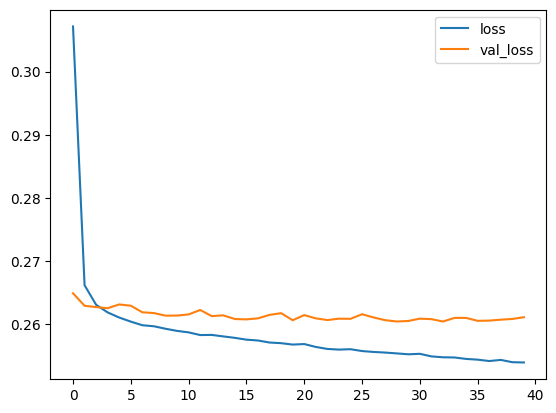

In [161]:
losses.plot()

In [162]:
from sklearn.metrics import classification_report, confusion_matrix

In [163]:
pred = (model.predict(X_test) > 0.5).astype('int32')

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [164]:
confusion_matrix(y_test, pred)

array([[ 6908,  8750],
       [  155, 63231]])

In [165]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



Exemple

In [166]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

,305323
loan_amnt,25000.0
term,60
int_rate,18.24
installment,638.11
annual_inc,61665.0
...,...
30723,True
48052,False
70466,False
86630,False


In [167]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [168]:
(model.predict(new_customer)>0.5).astype('int32')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[1]], dtype=int32)

In [169]:
df.iloc[random_ind]['loan_repaid']

1